In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 262.1 kB/s eta 0:00:55
   - -------------------------------------- 0.5/14.8 MB 262.1 kB/s eta 0:00:55
   -- ------------------------------------- 0.8/14.8 MB 385.5 kB/s eta 0:00:37
   -- ------------------------------------- 0.8/14.8 MB 385.5 kB/s eta 0:00:37
   -- ------------------------------------- 0.8/14.8 MB 385.5 kB/s eta 0:00:37
   -- ------------------------------------- 0

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [13]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# You can now access various data related to Tesla
tesla_info = tesla_ticker.info
print(tesla_info)


{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [19]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data with the 'max' period
tesla_data = tesla_ticker.history(period="max")

# Display the dataframe
print(tesla_data)


                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2025-03-31 00:00:00-04:00  249.309998  260.559998  243.360001  259.160004   
2025-04-01 00:00:00-04:00  263.799988  277.450012  259.250000  268.459991   
2025-04-02 00:00:00-04:00  254.600006  284.989990  251.270004  282.760010   
2025-04-03 00:00:00-04:00  265.290009  276.299988  261.510010  267.279999   
2025-04-04 00:00:00-04:00  255.380005  261.000000  236.000000  239.429993   

In [21]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data with the 'max' period
tesla_data = tesla_ticker.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [23]:
import requests

In [29]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [44]:
response = requests.get(url)

In [48]:
html_data_2 = response.text

In [50]:
print(html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [54]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [56]:
title = soup.title.string

In [58]:
print(title)

GameStop Revenue 2006-2020 | GME | MacroTrends


In [62]:
pretty_html = soup.prettify()

In [64]:
print(pretty_html)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

In [106]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the page
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)

# Step 2: Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Find the h2 header that contains 'GameStop Revenue'
gme_header = soup.find('h2', text=lambda t: 'GameStop Revenue' in t)

# Step 4: Get the table right after the header
gme_table = gme_header.find_next('table')

# Step 5: Read the table into DataFrame
gme_revenue = pd.read_html(str(gme_table))[0]

# Step 6: Rename Columns
gme_revenue.columns = ['Date', 'Revenue']

# Step 7: Clean the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({r'\$': '', r',': ''}, regex=True)

# Step 8: Show the result
print(gme_revenue.head())


   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


C:\Users\User\AppData\Local\Temp\ipykernel_15012\1597972812.py:13: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.



In [108]:
gme_revenue.tail

<bound method NDFrame.tail of     Date Revenue
0   2020    6466
1   2019    8285
2   2018    8547
3   2017    7965
4   2016    9364
5   2015    9296
6   2014    9040
7   2013    8887
8   2012    9551
9   2011    9474
10  2010    9078
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843>

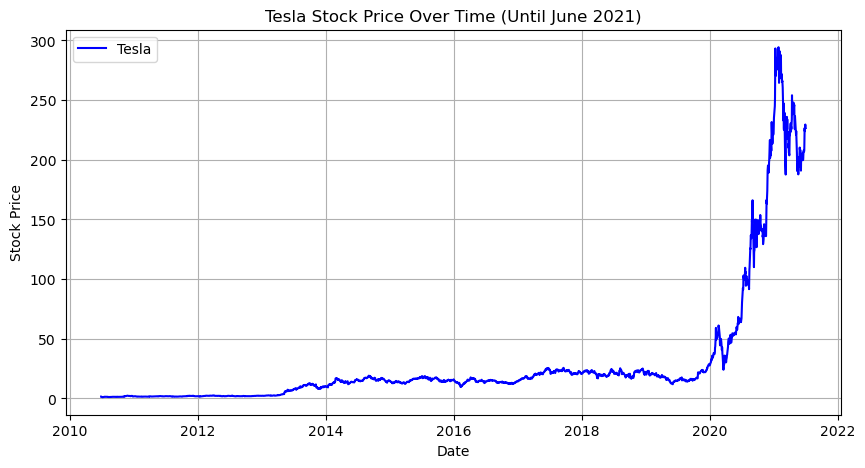

In [110]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(df, stock_name):
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter data up to June 2021
    df = df[df['Date'] <= '2021-06-30']
    
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Close'], label=stock_name, color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'{stock_name} Stock Price Over Time (Until June 2021)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function for Tesla Data
make_graph(tesla_data, 'Tesla')


In [114]:
import yfinance as yf
import pandas as pd

# Download GameStop Stock Data
gme = yf.Ticker('GME')

# Get historical market data
gme_data = gme.history(period='max')

# Reset index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Show first few rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


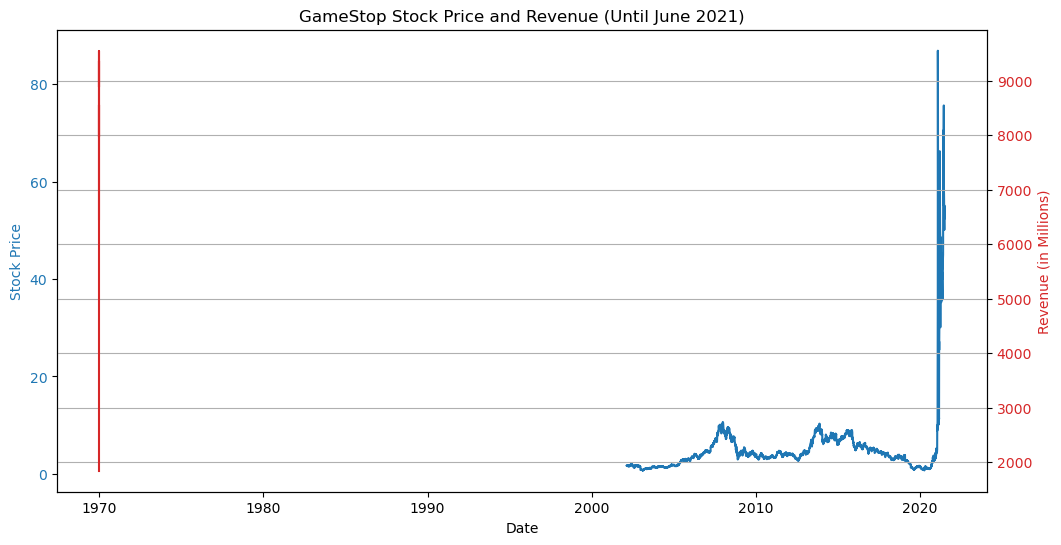

In [116]:
make_graph(gme_data, gme_revenue, 'GameStop')
